In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn.cluster
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from sunbird.nan_values import arbitrary_imputation, capture_nan
from plotnine import *
import plotnine
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
from prince import MCA

In [2]:
df = pd.read_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/joinedfile.csv')

In [3]:
columns_to_drop = [13,16,17,18,21,22,32,33,34,35,43,44,47,48,51,53,54,63,65,66,67,73,75,76,77,78,82,86,88,89,90,91,92]
porsche_app_df = df.drop(columns = df.columns[columns_to_drop],axis = 1)
porsche_app_df.to_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/my_porsche_joinedfile_dropped.csv')

In [4]:
porsche_app_df_columns = porsche_app_df.columns.to_list()
porsche_app_head_df = pd.DataFrame({'Columns Names' : porsche_app_df_columns})
porsche_app_head_df.to_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/my_porsche_droppedcolshead.csv')

In [5]:
porsche_app_df

,batterysize,chargestatus_pdp,chargingtype,error_4,error_3,error_2,error_1,last_bms_ist_vorlauf_temperatur,max_bms_ist_temperatur_hoeschste,max_bms_ist_zell_spannung_max_modul_id,...,earliestfailedevent,eventsequence,latesterrorcode,platform,saleschannel,status_code,consumedenergy,countofstopretries,nooferrors,charging_status_pt
0,big,error,Keine_Auswahl,False,False,False,True,40.0,21.0,6.0,...,NaN,start_request_received>chargingservice_chargin...,NaN,HUBJECT,CONNECT_STORE,0,7.70,0,0,Normal
1,big,error,Keine_Auswahl,False,False,False,True,27.0,36.0,6.0,...,NaN,start_request_received>started>cdr_created,NaN,HUBJECT,CONNECT_STORE,0,50.26,0,0,Normal
2,big,error,Keine_Auswahl,False,False,False,True,33.5,53.0,6.0,...,NaN,start_request_received>started>cdr_created,NaN,HUBJECT,CONNECT_STORE,0,72.08,0,0,Normal
3,NaN,error,Keine_Auswahl,False,False,False,True,54.0,39.0,6.0,...,chargingservice_charging_session_cdr_not_accepted,start_request_received>started>cdr_not_accepted,CDR_INVALID_CHARGE_VALUES_CONSUMED_ENERGY,HUBJECT,NaN,0,0.00,0,1,Short Charging
4,big,error,DC_Laden,False,False,False,True,23.5,51.0,6.0,...,NaN,start_request_received>started>cdr_created,NaN,HUBJECT,CONNECT_STORE,0,16.28,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,NaN,success,Keine_Auswahl,False,False,False,False,33.5,27.0,4.0,...,NaN,start_request_received>started,NaN,HUBJECT,NaN,1,NaN,0,0,Short Charging
7227,big,success,Konditionierung,False,False,False,False,29.5,31.0,5.0,...,chargingservice_charging_session_cdr_not_accepted,start_request_received>start_request_sending_t...,CDR_INVALID_CHARGE_VALUES_CONSUMED_ENERGY,HUBJECT,NaN,0,0.00,0,1,Short Charging
7228,big,success,Keine_Auswahl,False,False,False,False,41.5,35.0,5.0,...,chargingservice_charging_session_cdr_not_accepted,start_request_received>started>cdr_not_accepted,CDR_INVALID_CHARGE_VALUES_CONSUMED_ENERGY,HUBJECT,NaN,0,0.00,0,1,Short Charging
7229,big,success,Keine_Auswahl,False,False,False,False,2.0,3.0,2.0,...,chargingservice_charging_session_cdr_not_accepted,start_request_received>started>cdr_not_accepted,CDR_INVALID_CHARGE_VALUES_CONSUMED_ENERGY,HUBJECT,NaN,0,0.00,0,1,Short Charging


In [6]:
porsche_app_df.iloc[:,0:7] = porsche_app_df.iloc[:,0:7].astype(str)
porsche_app_df.iloc[:,46:56] = porsche_app_df.iloc[:,46:56].astype(str)
porsche_app_df.iloc[:,57:60] = porsche_app_df.iloc[:,57:60].astype(float)
porsche_app_df.iloc[:,7:44] = porsche_app_df.iloc[:,7:44].astype(float)
porsche_app_df.iloc[:,50:53] = porsche_app_df.iloc[:,50:53].astype(str)
porsche_app_df.iloc[:,0:7] = porsche_app_df.iloc[:,0:7].astype(str)
porsche_app_df.iloc[:,47:56] = porsche_app_df.iloc[:,47:56].fillna('missing value')
porsche_app_df.iloc[:,57:60] = porsche_app_df.iloc[:,57:60].fillna('missing value')
decoded_porsche_app_df = porsche_app_df.copy()

C:\Users\arb\AppData\Local\Temp\ipykernel_31668\3759601087.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
C:\Users\arb\AppData\Local\Temp\ipykernel_31668\3759601087.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [7]:
#column_ranges = [slice(0,7),slice(46,49),slice(50,53), [57]]
#encoder = LabelEncoder()
#for column_range in column_ranges:
    #if isinstance(column_range, slice):
        #selected_columns = porsche_app_df.iloc[:, column_range]
    #else:
        #selected_columns = porsche_app_df.iloc[:, column_range]

    #for column in selected_columns.columns:
        #porsche_app_df[column] = encoder.fit_transform(porsche_app_df[column])

In [8]:
scaler = MinMaxScaler()
column_numbers_to_scale = [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,58,59]
data_to_scale = porsche_app_df.values
data_to_scale[:, column_numbers_to_scale] = scaler.fit_transform(data_to_scale[:, column_numbers_to_scale])
porsche_app_df = pd.DataFrame(data_to_scale, columns=porsche_app_df.columns)
#porsche_app_df.iloc[:, columns_to_normalize_range_2] = scaler.fit_transform(porsche_app_df.iloc[:, columns_to_normalize_range_2])

In [9]:
encoded_porsche_app_df = porsche_app_df.iloc[:,:].fillna('-0.1')
encoded_porsche_app_df.to_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/my_porsche_joinedfile_dropped_encoded.csv')

In [10]:
encoded_porsche_app_df_columns = encoded_porsche_app_df.columns.to_list()
encoded_porsche_app_head_df = pd.DataFrame({'Columns Names' : encoded_porsche_app_df_columns})
encoded_porsche_app_head_df.to_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/my_porsche_droppedcolshead_encoded.csv')
nan_counts = encoded_porsche_app_df.isnull().sum()
columns_with_nan_names = nan_counts[nan_counts > 0].index.tolist()
print("Columns with NaN values:", columns_with_nan_names)

Columns with NaN values: []


In [11]:
column_to_move = 'chargestatus_neu_logic'
columns_ordered = [column_to_move] + [col for col in encoded_porsche_app_df.columns if col != column_to_move]
encoded_porsche_app_df = encoded_porsche_app_df[columns_ordered]

In [12]:
encoded_porsche_app_df = encoded_porsche_app_df.iloc[:,:].astype(str)
result = encoded_porsche_app_df.dtypes
list(result)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [13]:
encoded_porsche_app_array = encoded_porsche_app_df.values
print(encoded_porsche_app_array)

[['success' 'big' 'error' ... '0.0' '0.0' 'Normal']
 ['success' 'big' 'error' ... '0.0' '0.0' 'Normal']
 ['success' 'big' 'error' ... '0.0' '0.0' 'Normal']
 ...
 ['success' 'big' 'success' ... '0.0' '0.07142857142857142'
  'Short Charging']
 ['success' 'big' 'success' ... '0.0' '0.07142857142857142'
  'Short Charging']
 ['success' 'big' 'success' ... '0.0' '0.07142857142857142'
  'Short Charging']]


In [14]:
cost = []
for cluster in range(1, 20):
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang')
        kmodes.fit_predict(encoded_porsche_app_array)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19


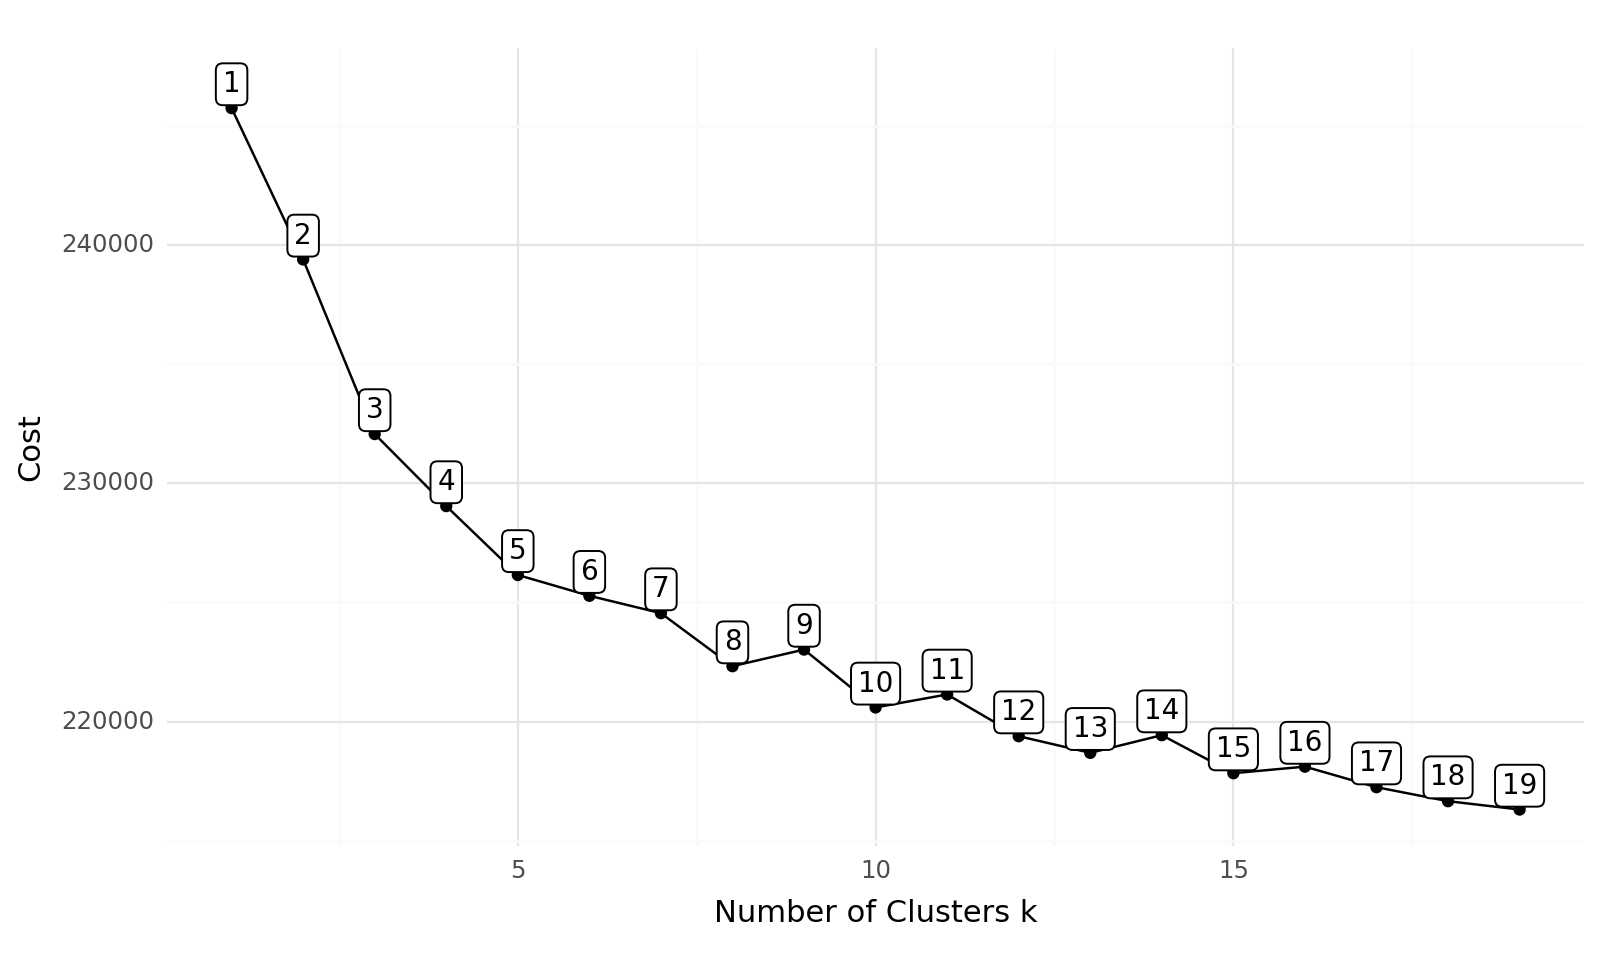

<Figure Size: (800 x 480)>

In [15]:
df_cost = pd.DataFrame({'Cluster':range(1,20), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [16]:
kmodes = KModes(n_clusters = 9, init = 'Huang', verbose = 2, random_state = 1)
clusters = kmodes.fit_predict(encoded_porsche_app_array)
pd.Series(clusters).value_counts()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2806, cost: 226522.0
Run 1, iteration: 2/100, moves: 1045, cost: 223200.0
Run 1, iteration: 3/100, moves: 1084, cost: 222094.0
Run 1, iteration: 4/100, moves: 233, cost: 222044.0
Run 1, iteration: 5/100, moves: 19, cost: 222044.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2158, cost: 227568.0
Run 2, iteration: 2/100, moves: 374, cost: 227509.0
Run 2, iteration: 3/100, moves: 51, cost: 227509.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2768, cost: 228482.0
Run 3, iteration: 2/100, moves: 1257, cost: 223781.0
Run 3, iteration: 3/100, moves: 1121, cost: 223378.0
Run 3, iteration: 4/100, moves: 164, cost: 223292.0
Run 3, iteration: 5/100, moves: 67, cost: 223181.0
Run 3, iteration: 6/100, moves: 4, cost: 223181.0
Init: initializing centroids
I

6    1209
1    1040
4    1011
7     983
3     949
0     657
2     592
8     411
5     379
dtype: int64

In [17]:
cluster_attr_matrix = pd.DataFrame(encoded_porsche_app_df)
cluster_attr_matrix['clusters'] = clusters
sorted_df = cluster_attr_matrix.sort_values(by='clusters')
sorted_df['clusters'] = scaler.fit_transform(sorted_df[['clusters']])
column_to_move = 'clusters'
columns_ordered = [column_to_move] + [col for col in sorted_df.columns if col != column_to_move]
sorted_df = sorted_df[columns_ordered]
sorted_df.to_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/clustered_files.csv')

In [18]:
column_ranges = [slice(0,62)]
encoder = LabelEncoder()
for column_range in column_ranges:
    if isinstance(column_range, slice):
        selected_columns = sorted_df.iloc[:, column_range]
    else:
        selected_columns = sorted_df.iloc[:, column_range]

    for column in selected_columns.columns:
        sorted_df[column] = encoder.fit_transform(sorted_df[column])
        
scaler = MinMaxScaler()
columns_to_scale = sorted_df.columns
sorted_df[columns_to_scale] = scaler.fit_transform(sorted_df[columns_to_scale])

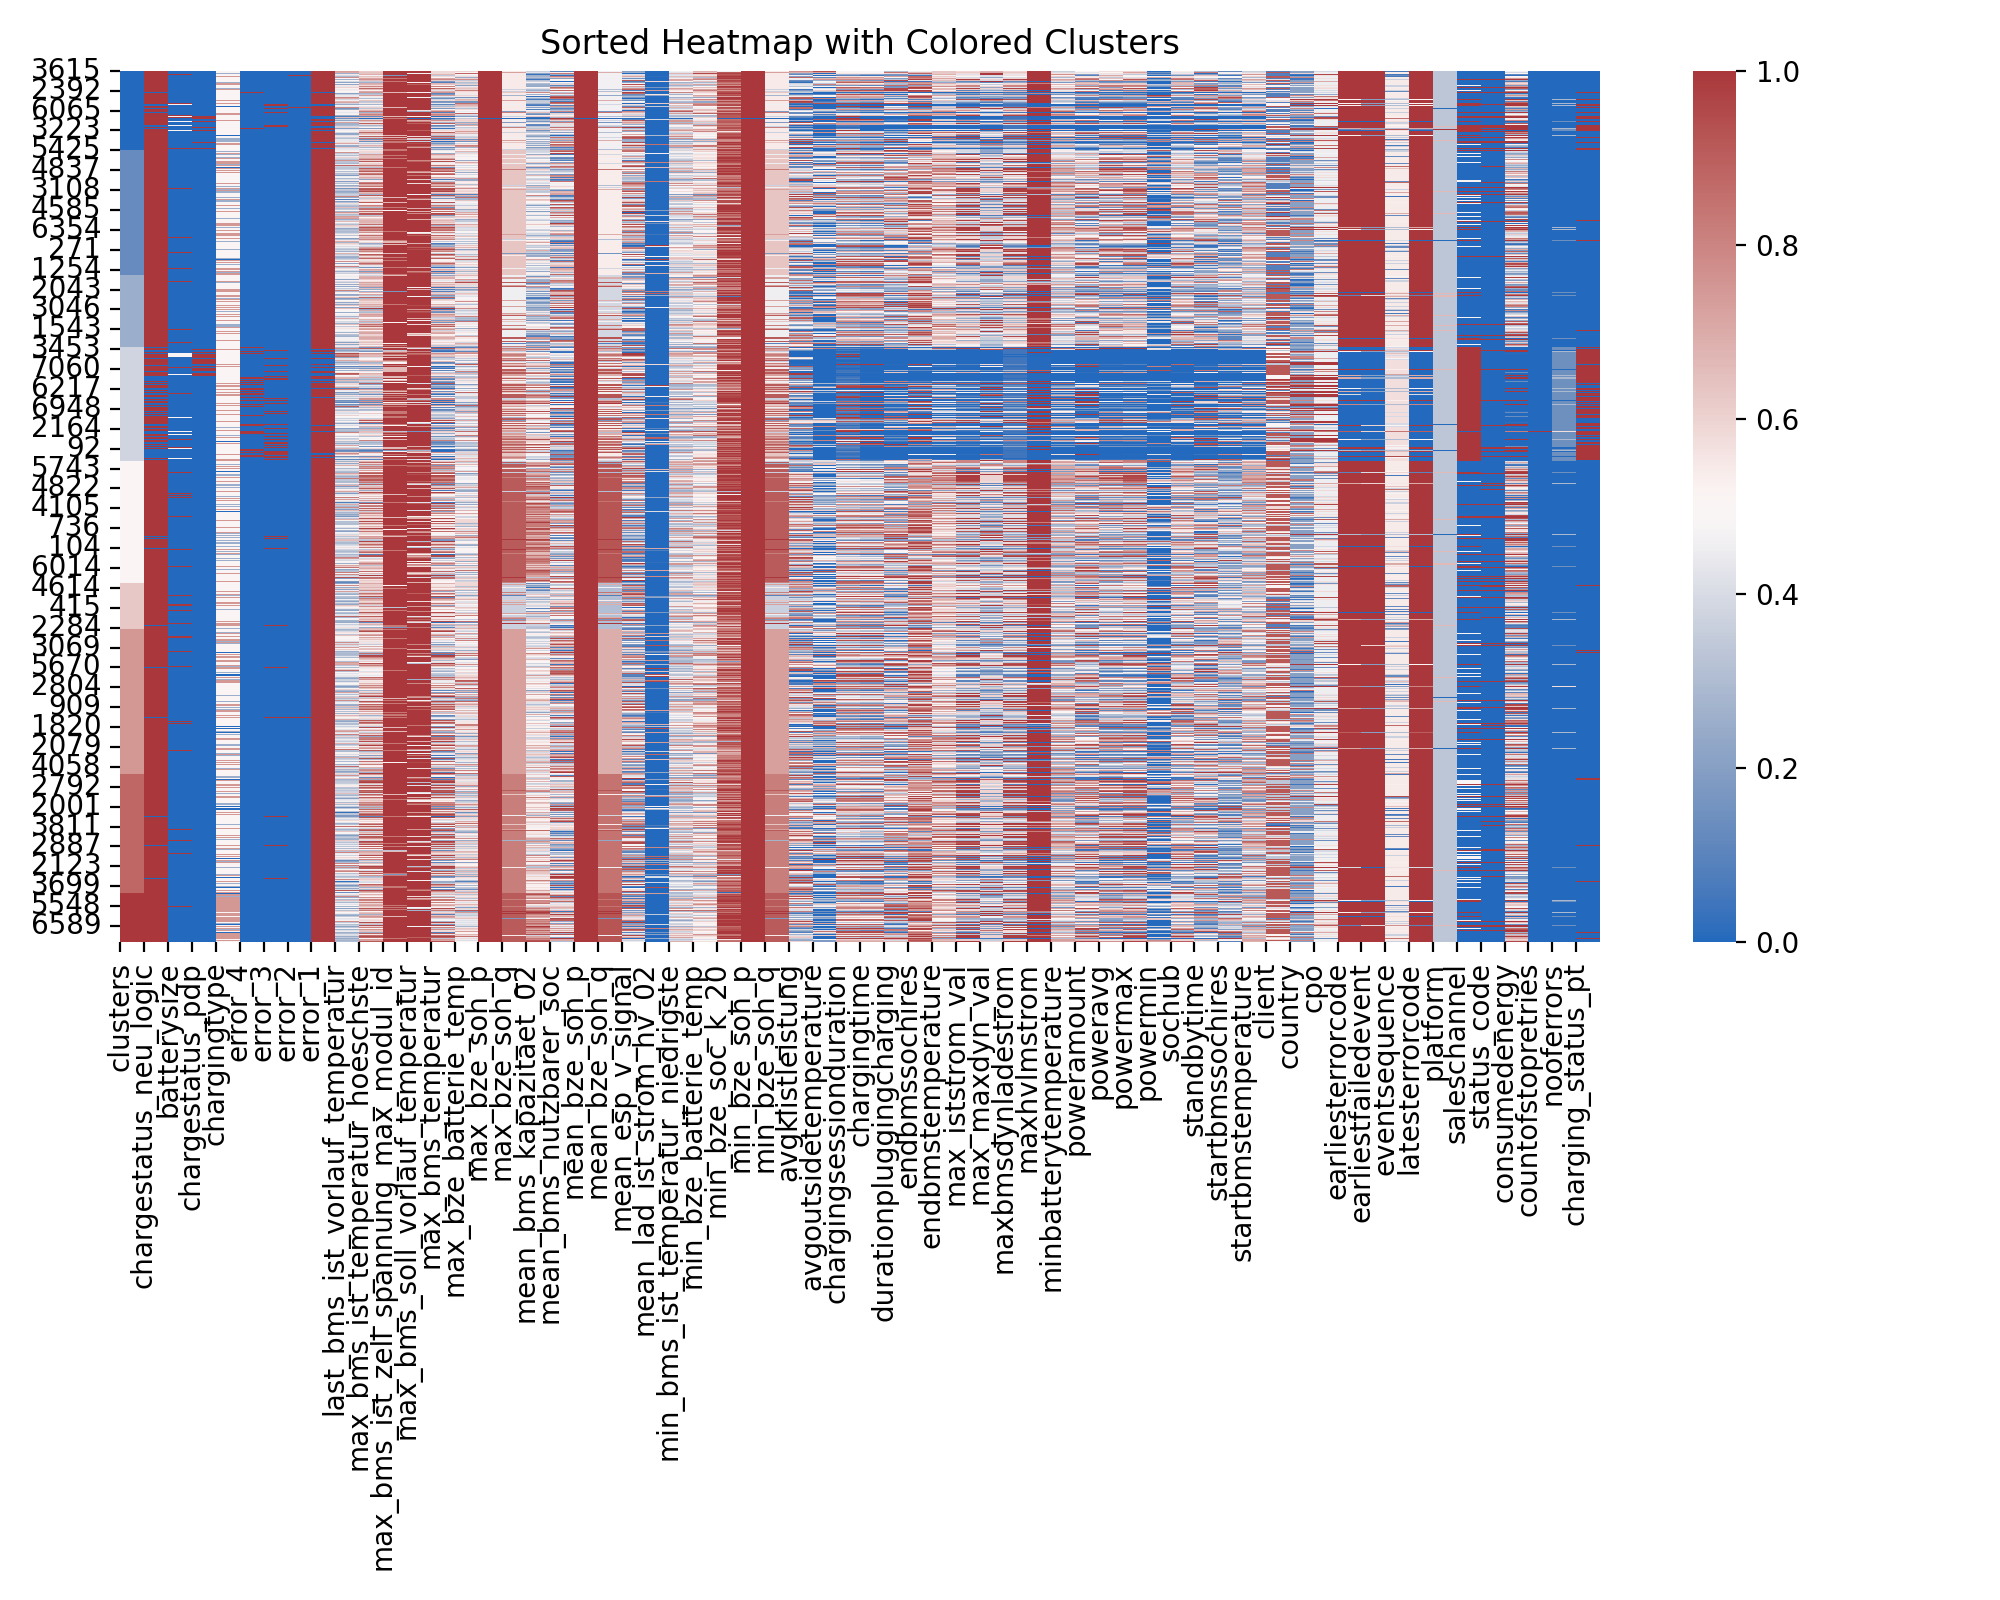

In [19]:
selected_columns = sorted_df.columns[::]
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_df, cmap='vlag')
plt.title("Sorted Heatmap with Colored Clusters")
plt.xticks(ticks=range(len(selected_columns)), labels=selected_columns, rotation=90)
plt.tight_layout()
plt.savefig('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/Porsche_app_Kmodes_heatmap.png', dpi=600)
plt.show()

In [25]:
cluster_centers = kmodes.cluster_centroids_
hierarchical_clusters = linkage(cluster_centers,method='ward')

ValueError: could not convert string to float: 'success'

In [21]:
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_clusters)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

NameError: name 'hierarchical_clusters' is not defined

In [ ]:
sorted_df = sorted_df.drop(columns = ['clusters'], axis =1)
pca = PCA(n_components = 4)
reduced_features = pca.fit_transform(sorted_df)
reduced_features

In [ ]:
cluster_labels = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9','Cluster10']
plt.figure(figsize=(10, 7))
for cluster_id in set(clusters):
    cluster_points = reduced_features[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=3, label=cluster_labels[cluster_id])
plt.title("K-Modes Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
loadings = pca.components_

In [ ]:
plt.figure(figsize=(10, 7))

num_components = len(loadings)
num_features = len(sorted_df.columns)
bar_width = 0.2
x_positions = np.arange(num_features)

for i in range(num_components):
    shifted_positions = x_positions + (i - (num_components - 1) / 2) * bar_width
    plt.bar(shifted_positions, loadings[i], width=bar_width, label=f'Principal Component {i+1}',)

plt.xticks(x_positions, sorted_df.columns, rotation=90)
plt.title("Principal Component Loadings")
plt.tick_params(axis='x', which='both', labelsize='small')
plt.xlabel("Original Features")
plt.ylabel("Loadings")
plt.tight_layout()
plt.grid(axis='x')
plt.legend(fontsize = 'small', loc = 'upper left')
plt.savefig('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/PCA_loadings.png', dpi=600)
plt.show()

In [ ]:
loadings_df = pd.DataFrame(loadings, columns=encoded_porsche_app_df.columns, index=['PC1', 'PC2', 'PC3', 'PC4'])


loadings_excel = 'C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/pcaloadings.xlsx'
loadings_df.to_excel(loadings_excel, index=True)

print(f"Principal component loadings saved to {loadings_excel}")

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(15, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', color='r')
plt.xlabel('Principal components')
plt.ylabel('Variance')
plt.title('Variance Ratio and Cumulative Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1), rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/PCA_variance.png', dpi=600)
plt.show()

In [ ]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(sorted_df)

In [ ]:
sorted_df['cluster'] = cluster_labels

In [ ]:
linkage_matrix = linkage(sorted_df.drop('cluster', axis=1), method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=encoded_porsche_app_df.index, orientation='top')
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

In [ ]:
status_column = sorted_df['clusters']
cluster_data = sorted_df.drop('clusters', axis=1)
cluster_data = cluster_data.drop('cluster', axis=1)
new_df = pd.concat([status_column, cluster_data], axis=1)
status_colors = { 0:"#FFFF00", 1:"#00FF00", 2:"#FFA500"}
status_color_map = [status_colors[status] for status in new_df['charging_status_pt']]
plt.figure(figsize=(12, 8))
sns.clustermap(new_df.drop('clusters', axis=1), cmap="vlag",standard_scale=1,
               xticklabels=True, row_colors=[status_color_map])
plt.title('Heatmap with Status Column')
plt.savefig('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/Porsche_app_Hierarchical_plot.png', dpi=600)
plt.show()

In [ ]:
decoded_porsche_app_df['clusters'] = cluster_attr_matrix['clusters']
decoded_porsche_app_df.to_csv('C:/Users/arb/PycharmProjects/PCA_data/files/csv_files/Kmodes_joinedfile/decodec_cluster_files.csv')